In [4]:
####Rene 5_7_2022

#This script generates formula assignments from Thermo Raw data.

# Import the os module
import os
import pandas as pd
import numpy as np

print(os.path.abspath(os.curdir))

# Change the current working directory
#os.chdir(os.path.dirname(os.getcwd()))
#print(os.path.abspath(os.curdir))

os.chdir('/Users/boiteaur/Desktop/CoreMS_metallomics/CoreMS')



import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -2
MSParameters.molecular_search.max_ppm_error = 2

MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = 0
MSParameters.molecular_search.max_dbe = 18

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,4)
MSParameters.molecular_search.usedAtoms['Fe'] = (0,1)

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"


###### Set file folder and THERMO RAW file name here:

file_location = '/Users/boiteaur/Desktop/CoreMS_metallomics/CoreMS_Metallomics_Data/'
file_name="MeOH_Frac_Lig_Fe_pos.raw"



#Set peak detection threshold method
#MSParameters.mass_spectrum.threshold_method = 'relative_abundance'
#MSParameters.mass_spectrum.relative_abundance_threshold = 0.01

#MSParameters.mass_spectrum.threshold_method = 'auto'
#MSParameters.mass_spectrum.s2n_threshold = 4

MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.max_picking_mz = 1000
MSParameters.mass_spectrum.s2n_threshold = 3

MSParameters.ms_peak.peak_min_prominence_percent = 0.02



#Parser for thermo RAW files. 
parser = rawFileReader.ImportMassSpectraThermoMSFileReader(file_location+file_name)


c:\Users\boiteaur\Desktop\CoreMS_metallomics\CoreMS


'runworker'  28.99 ms


Loading molecular formula database: 153018it [00:14, 10838.98it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Fe": 1}, (de)protonated : 100%|██████████| 200/200 [00:03<00:00, 60.06it/s]


'run_molecular_formula'  17718.29 ms
450 assigned peaks and 944 unassigned peaks, total  = 32.28 %, relative abundance = 25.39 %, RMS error (best candidate) (ppm) = 1.031


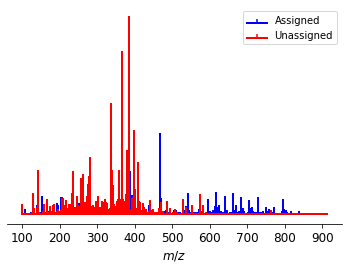

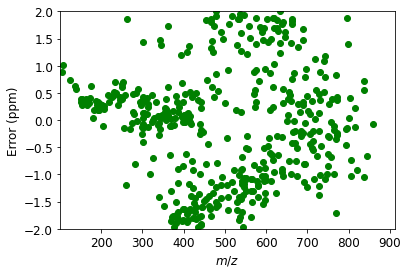

In [18]:
#Build formula assignment lists
#Retrieve TIC for MS1 scans over the time range between 'timestart' and 'timestop' 
tic=parser.get_tic(ms_type='MS')[0]
tic_df=pd.DataFrame({'time': tic.time,'scan': tic.scans})

 #Now, get an average mass spectrum and list the centroided m/z values of the spectrum. One of these should be the molecule of interest.
AverageMS = parser.get_average_mass_spectrum_by_scanlist(tic.scans)
mass_spectrum=AverageMS
SearchMolecularFormulas(mass_spectrum, first_hit=False).run_worker_mass_spectrum()

mass_spectrum.percentile_assigned(report_error=True)

mass_spectrum_by_classes = HeteroatomsClassification(mass_spectrum, choose_molecular_formula=True)

mass_spectrum_by_classes.plot_ms_assigned_unassigned()
plt.show()
mass_spectrum_by_classes.plot_mz_error()
plt.show()



In [20]:
assignments=mass_spectrum.to_dataframe()
assignments=assignments.sort_values(by=['m/z'])

print(assignments.columns.values)
#print(assignments)
print(assignments[assignments['Fe']>0].filter(['m/z','Peak Height','Molecular Formula','m/z Error (ppm)','Confidence Score']))

assignments.to_csv(file_location+file_name+'assignments.csv')


['Index' 'm/z' 'Calibrated m/z' 'Calculated m/z' 'Peak Height' 'Peak Area'
 'Resolving Power' 'S/N' 'Ion Charge' 'm/z Error (ppm)' 'm/z Error Score'
 'Isotopologue Similarity' 'Confidence Score' 'DBE' 'H/C' 'O/C'
 'Heteroatom Class' 'Ion Type' 'Is Isotopologue' 'Mono Isotopic Index'
 'Molecular Formula' 'C' 'H' 'O' 'N' '13C' 'Fe' '57Fe']
            m/z   Peak Height   Molecular Formula  m/z Error (ppm)  \
94   353.078878  1.858608e+06   C14 H20 O5 N2 Fe1        -1.575071   
110  369.094790  1.287773e+06   C11 H24 O8 N2 Fe1        -1.864560   
114  373.177763  2.431767e+06   C16 H32 O4 N2 Fe1        -1.761852   
117  377.136210  1.035188e+06   C14 H28 O6 N2 Fe1        -1.960333   
120  381.110159  3.511124e+06   C16 H24 O5 N2 Fe1        -1.512015   
..          ...           ...                 ...              ...   
448  837.196224  2.649933e+06  C30 H44 O20 N4 Fe1        -1.049841   
449  837.590730  1.130570e+06      C47 H88 O8 Fe1         0.712934   
450  838.196845  1.417711e+06 